In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
%matplotlib inline


calendar=pd.read_csv("calendar.csv")
listings=pd.read_csv("listings.csv")
reviews=pd.read_csv("reviews.csv")


In [18]:
# Calendar's dataframe, checking number of rows and columns and columns with missing/nonmissing values


print("Number of rows in calendar table is :",calendar.shape[0])
print("Number of columns in calendar table is :",calendar.shape[1])
no_nulls=set(calendar.dropna().columns)
print("Columns in calendar table with no missing values are :",no_nulls)
most_nulls_cols=set(calendar.columns[calendar.isnull().mean()>0.75])
print("Columns in calendar table with most missing values :",most_nulls_cols)
calendar.head()

#Which is the period with lowest price for apartments in Seattle airbnb and what are the busiest times of the year?

Number of rows in calendar table is : 1393570
Number of columns in calendar table is : 4
Columns in calendar table with no missing values are : {'available', 'date', 'listing_id', 'price'}
Columns in calendar table with most missing values : set()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [12]:
#Converting price from string to float in calendar's data frame and creating a dataframeGroupBy for mean price value for specific
#listing id

calendar['price']=calendar['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
mean_vals=calendar.groupby('listing_id')['price'].transform('mean')
print(mean_vals)


0          85.0
1          85.0
2          85.0
3          85.0
4          85.0
           ... 
1393565    87.0
1393566    87.0
1393567    87.0
1393568    87.0
1393569    87.0
Name: price, Length: 1393570, dtype: float64


(100.0, 150.0)

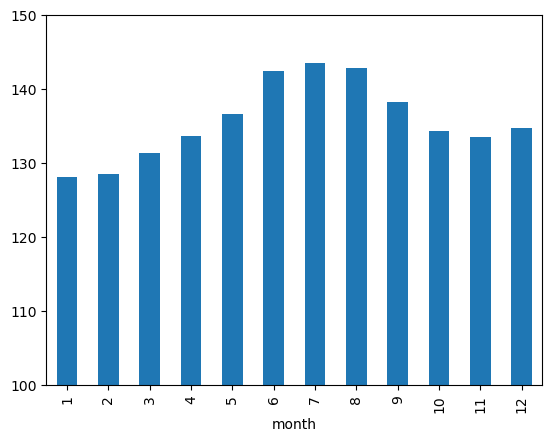

In [13]:
"""
Filling null values in Calendar dataframe with mean values created above.Plotting a mean price for each month of the year
"""

calendar['price'] = calendar['price'].fillna(mean_vals)
calendar['date']=pd.to_datetime(calendar['date'])
calendar['month']=calendar['date'].dt.month
month_mean_price=calendar.groupby('month')['price'].mean()
month_mean_price.plot(kind='bar')
plt.ylim(100,150)

<Axes: >

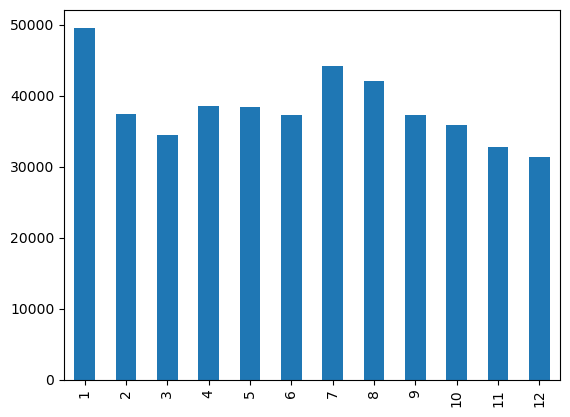

In [16]:
"""
Getting from the calendar table only busy dates where available column is false and plotting most booked months.
"""

calendar_not_avail=calendar[calendar['available']=='f']
calendar_not_avail['month'].value_counts().sort_index().plot(kind='bar')

In [ ]:
"""

From the calendar table we have imputed null values in Price column with the mean price of that Specific Apartment ID in order 
to get Price column with 0 missing values for every day (20% of the column was NaN). After that we extract the month from the
date column to get only the month out of the whole date, so we can make a mean price value groupped by only month to see when
the price was lower and answer our business Question: Which is the time period with the lowest Prices in Seattle Apartments (Airbnb)?
From the Bar Chart above we can see that on the first Month January prices are lower than anytime of the year. Also we can see
from the above graph that the busiest period of times is still January which may have a correlation with the lower prices also.

"""